### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data import data_load
from src.utils.parse_date_time import parse_date_time 
from src.data import data_save

### Importing and Understanding data

In [2]:
path = "../data/raw/fraud_data.csv"
fraud_data = data_load.load_csv(path)

In [3]:
fraud_data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [4]:
fraud_data.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                  object
dtype: object

In [5]:
fraud_data.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [7]:
fraud_data.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
fraud_data.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Data cleaning

In [9]:
~fraud_data.duplicated()

0        True
1        True
2        True
3        True
4        True
         ... 
14441    True
14442    True
14443    True
14444    True
14445    True
Length: 14446, dtype: bool

In [10]:
fraud_data[~fraud_data.duplicated()]

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [11]:
fraud_data.query("trans_date_trans_time == '04-01-2019 00:58'")

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
8725,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1


In [12]:
fraud_data[~fraud_data.duplicated()]

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [13]:
fraud_data.query("trans_date_trans_time == '07-02-2019 23:17'")

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
106,07-02-2019 23:17,"""Rodriguez, Yost and Jenkins""",misc_net,768.00,La Grande,OR,45.3304,-118.0852,16955,"""Engineer, site""",16-06-1961,dbb826b885f763456851e9d8ddaa4662,45.224147,-118.552234,1
107,07-02-2019 23:17,"""Schumm, Bauch and Ondrick""",grocery_pos,309.02,Port Costa,CA,38.0460,-122.1866,198,Armed forces training and education officer,31-03-1959,c8e1a2c45d670a8c600a89c5f0677d88,37.964672,-122.708937,1


In [14]:
~fraud_data.duplicated(subset="trans_date_trans_time")

0         True
1         True
2         True
3         True
4         True
         ...  
14441    False
14442     True
14443     True
14444     True
14445     True
Length: 14446, dtype: bool

In [15]:
fraud_data.iloc[33]

trans_date_trans_time                       13-01-2019 23:45
merchant                 "Parisian, Schiller and Altenwerth"
category                                            misc_net
amt                                                   790.35
city                                                San Jose
state                                                     CA
lat                                                  37.3304
long                                               -121.7913
city_pop                                              973849
job                                           Science writer
dob                                               12-06-1955
trans_num                   7d7d61dc3b301c78ca3c0cf73e8ed72e
merch_lat                                          37.033841
merch_long                                       -121.371988
is_fraud                                                   1
Name: 33, dtype: object

In [16]:
fraud_data.query("trans_date_trans_time == '24-12-2020 18:14'")

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
1818,24-12-2020 18:14,Auer-West,shopping_net,4.24,Moriarty,NM,34.9889,-106.0609,7268,"""Therapist, art""",04-08-1988,28f7ec30170fa64c36bbd487cd114c2c,34.039105,-105.260517,0
1819,24-12-2020 18:14,Friesen Lt,health_fitness,27.08,Lowell,OR,43.9210,-122.7806,1420,Systems analyst,11-11-1965,926c62e80f6f3b1fd4aaabb88fb1e427,43.487317,-122.473412,0
1820,24-12-2020 18:14,Larson-Moen,entertainment,21.41,Holstein,NE,40.4542,-98.6538,331,Telecommunications researcher,19-08-1950,7ac3850dbc98af2a0a16c27b0c5f7304,40.481078,-99.559413,0


In [17]:
fraud_data[fraud_data.duplicated(subset=["trans_date_trans_time", "merchant"])]

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
4924,28-12-2020 14:38,Renner Lt,home,49.05,Ballwin,MO,38.5770,-90.5255,92608,"""Engineer, communications""",26-07-2001,482c660575c52e48d2dd019fbd8927e1,38.519245,-90.181423,0
5671,29-12-2020 06:45,"""Raynor, Reinger and Hagenes""",gas_transport,54.74,Scotts Mills,OR,44.9897,-122.6187,1252,"""Engineer, petroleum""",06-02-1937,9989aaa1dce09080818efd7103f4a637,45.304215,-121.772218,0
6486,29-12-2020 22:20,"""Schiller, Blanda and Johnson""",home,47.56,Sacramento,CA,38.5662,-121.3286,757530,Magazine features editor,30-04-1979,4a89fd752554be44606aaa380e9debb1,39.472802,-121.674286,0
8725,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
8857,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13261,18-01-2019 14:38,Shanahan-Lehne,personal_care,21.54,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,ce3b2734ce646ef6a47b3484a8e043e5,38.211376,-109.986757,1
13372,18-01-2019 22:06,Beier LLC,entertainment,528.98,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,3417f366e2e1d5dd25a3a89a3aae9f3d,39.164469,-109.933543,1
13376,18-01-2019 22:12,Bartoletti and Sons,personal_care,21.23,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,2df9fa2d0e508ed2a83aa3ac6f4b5d5a,38.998205,-110.005615,1
13392,18-01-2019 23:16,Ankunding-Carroll,travel,9.33,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,a0ed41246d201717db7250fa2375c73b,39.230640,-108.990363,1


In [18]:
fraud_data[~fraud_data.duplicated(subset=["trans_date_trans_time", "merchant", "category"])]

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [19]:
fraud_data.query("trans_date_trans_time == '07-02-2019 23:17'")

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
106,07-02-2019 23:17,"""Rodriguez, Yost and Jenkins""",misc_net,768.00,La Grande,OR,45.3304,-118.0852,16955,"""Engineer, site""",16-06-1961,dbb826b885f763456851e9d8ddaa4662,45.224147,-118.552234,1
107,07-02-2019 23:17,"""Schumm, Bauch and Ondrick""",grocery_pos,309.02,Port Costa,CA,38.0460,-122.1866,198,Armed forces training and education officer,31-03-1959,c8e1a2c45d670a8c600a89c5f0677d88,37.964672,-122.708937,1


In [20]:
fraud_data = fraud_data[~fraud_data.duplicated(subset=["trans_date_trans_time", "merchant", "category"])]

In [21]:
fraud_data.head(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


### Data transforming 

In [22]:
fraud_data.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                  object
dtype: object

In [23]:
fraud_data.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [24]:
fraud_data = parse_date_time(fraud_data, "trans_date_trans_time", "trans_time", "trans_date")
fraud_data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,trans_time,trans_date
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,0,2019-04-01
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,15,2019-04-01
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,22,2019-04-01
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,23,2019-04-01
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,23,2019-04-01


In [25]:
fraud_data.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_time', 'trans_date'],
      dtype='object')

In [26]:
new_cols = ['trans_time', 'trans_date']

col = fraud_data.pop(new_cols[1])
fraud_data.insert(1, new_cols[1], col)

col = fraud_data.pop(new_cols[0])
fraud_data.insert(2, new_cols[0], col)

In [27]:
fraud_data.head()

,trans_date_trans_time,trans_date,trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,2019-04-01,0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,2019-04-01,15,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,2019-04-01,22,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,2019-04-01,23,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,2019-04-01,23,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [28]:
fraud_data["is_fraud"].value_counts()

is_fraud
0                         12597
1                          1781
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: count, dtype: int64

In [29]:
fraud_data["is_fraud"].replace({'0"2019-01-01 00:00:44"': 0,
                                '1"2020-12-24 16:56:24"': 1}, inplace=True)

C:\Users\ASF\AppData\Local\Temp\ipykernel_14192\105732613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fraud_data["is_fraud"].replace({'0"2019-01-01 00:00:44"': 0,


### Features analysis

In [30]:
fraud_data.dtypes

trans_date_trans_time    datetime64[ns]
trans_date                       object
trans_time                        int32
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                         object
dtype: object

In [31]:
fraud_data["is_fraud"] = fraud_data["is_fraud"].astype("int64")

In [32]:
fraud_data.dtypes

trans_date_trans_time    datetime64[ns]
trans_date                       object
trans_time                        int32
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

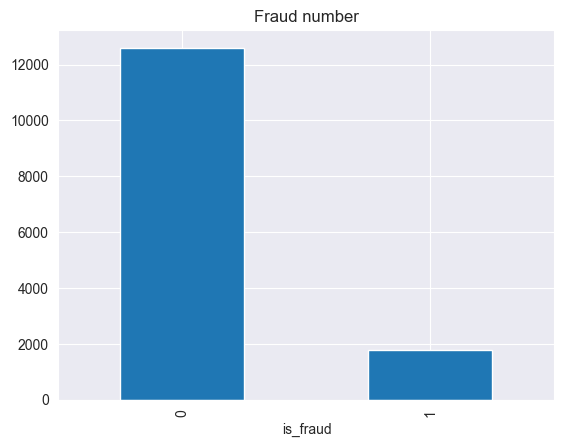

In [33]:
path_fig = "../reports"

ax = fraud_data["is_fraud"].value_counts() \
    .head(10) \
    .plot(kind="bar", title="Fraud number")
ax.xlabel="Is_fraud"
data_save.save_fig(path_fig+"/fraud_number.png")


In [34]:
fraud_data.head()

,trans_date_trans_time,trans_date,trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,2019-04-01,0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,2019-04-01,15,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,2019-04-01,22,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,2019-04-01,23,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,2019-04-01,23,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


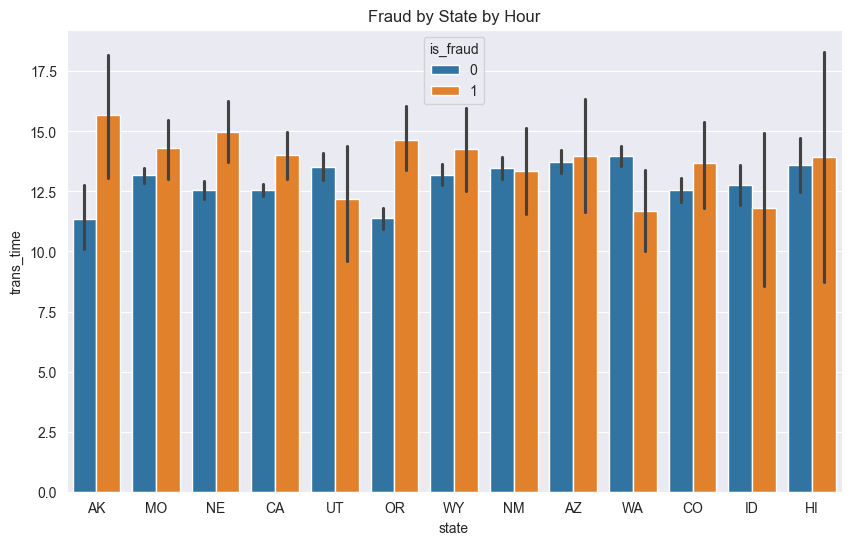

In [35]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(fraud_data, x="state", y="trans_time", hue="is_fraud")
ax.set_title("Fraud by State by Hour")
data_save.save_fig(path_fig+"/fraud_by_state_by_hour.png")
plt.show()

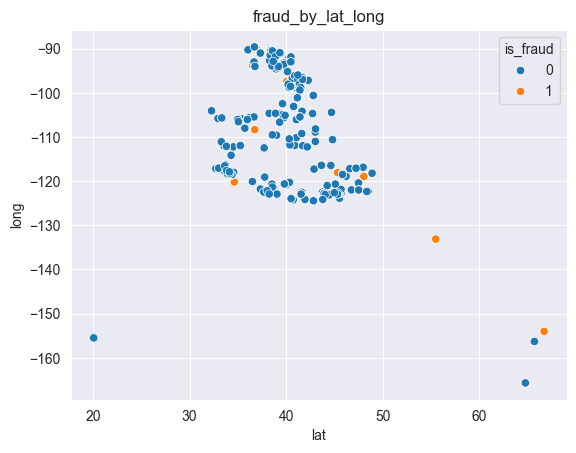

In [36]:
ax = sns.scatterplot(fraud_data, x="lat", y="long", hue="is_fraud")
data_save.save_fig(path_fig+"/lat_long_is_fraud.png")
ax.set_title("fraud_by_lat_long")
plt.show()

In [37]:
fraud_data.columns

Index(['trans_date_trans_time', 'trans_date', 'trans_time', 'merchant',
       'category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [38]:
cols = ['trans_time', 'amt', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud']

In [39]:
fraud_data.head()

,trans_date_trans_time,trans_date,trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,2019-04-01,0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,2019-04-01,15,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,2019-04-01,22,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,2019-04-01,23,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,2019-04-01,23,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


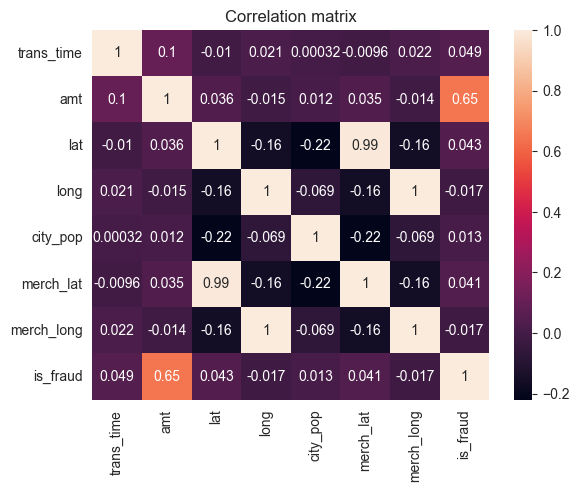

In [40]:
df_corr = fraud_data[cols].corr()
ax = sns.heatmap(df_corr, annot=True)
ax.set_title("Correlation matrix")
data_save.save_fig(path_fig+"/correlation_matrix.png")
plt.show()

In [41]:
fraud_data = fraud_data[cols]

In [42]:
fraud_data

,trans_time,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,0,14.37,64.7556,-165.6723,145,65.654142,-164.722603,1
1,15,966.11,64.7556,-165.6723,145,65.468863,-165.473127,1
2,22,49.61,64.7556,-165.6723,145,65.347667,-165.914542,1
3,23,295.26,64.7556,-165.6723,145,64.445035,-166.080207,1
4,23,18.17,64.7556,-165.6723,145,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...
14441,0,122.00,45.8289,-118.4971,1302,46.442439,-118.524214,0
14442,0,9.07,43.7857,-124.1437,260,42.901265,-124.995317,0
14443,0,104.84,44.6873,-104.4414,110,45.538062,-104.542117,0
14444,0,268.16,64.7556,-165.6723,145,64.081462,-165.898698,0


In [44]:
data_save.save_csv(fraud_data, "../data/processed")